# Let’s Start by importing the libraries:

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Highlighting the maximum values of each attribute in the data set



In [48]:
df=pd.read_csv('happiness score.csv')
df.head()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


In [49]:
#Checking out the shape of our data set

df.shape

(158, 12)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

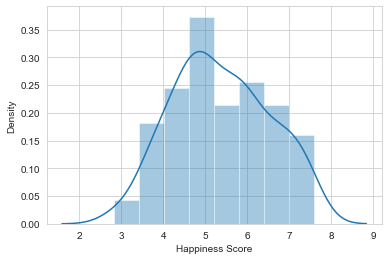

In [61]:
#Check out Correlations
sns.distplot(df['Happiness Score'])

<AxesSubplot:>

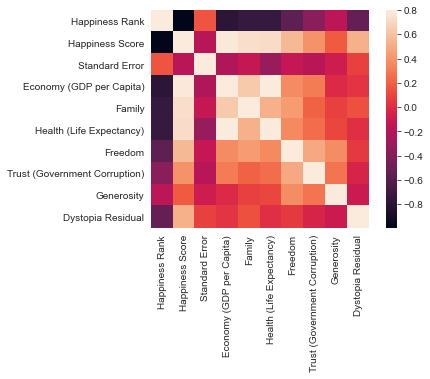

In [62]:
#heatmap
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Investigate Regional Happiness Ranking

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

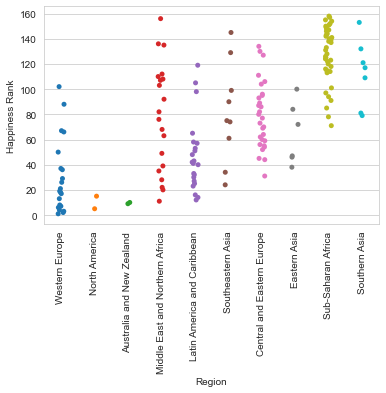

In [63]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xticks(rotation=90)

Setting up Linear Model to Predict Happiness

In [69]:
y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [71]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


Text(0, 0.5, 'Predicted Y')

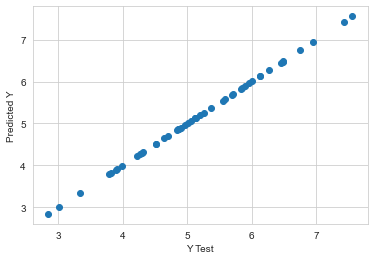

In [72]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [73]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.00026861910100892117
MSE: 9.548227095669277e-08
RMSE: 0.00030900205655738405


In [74]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


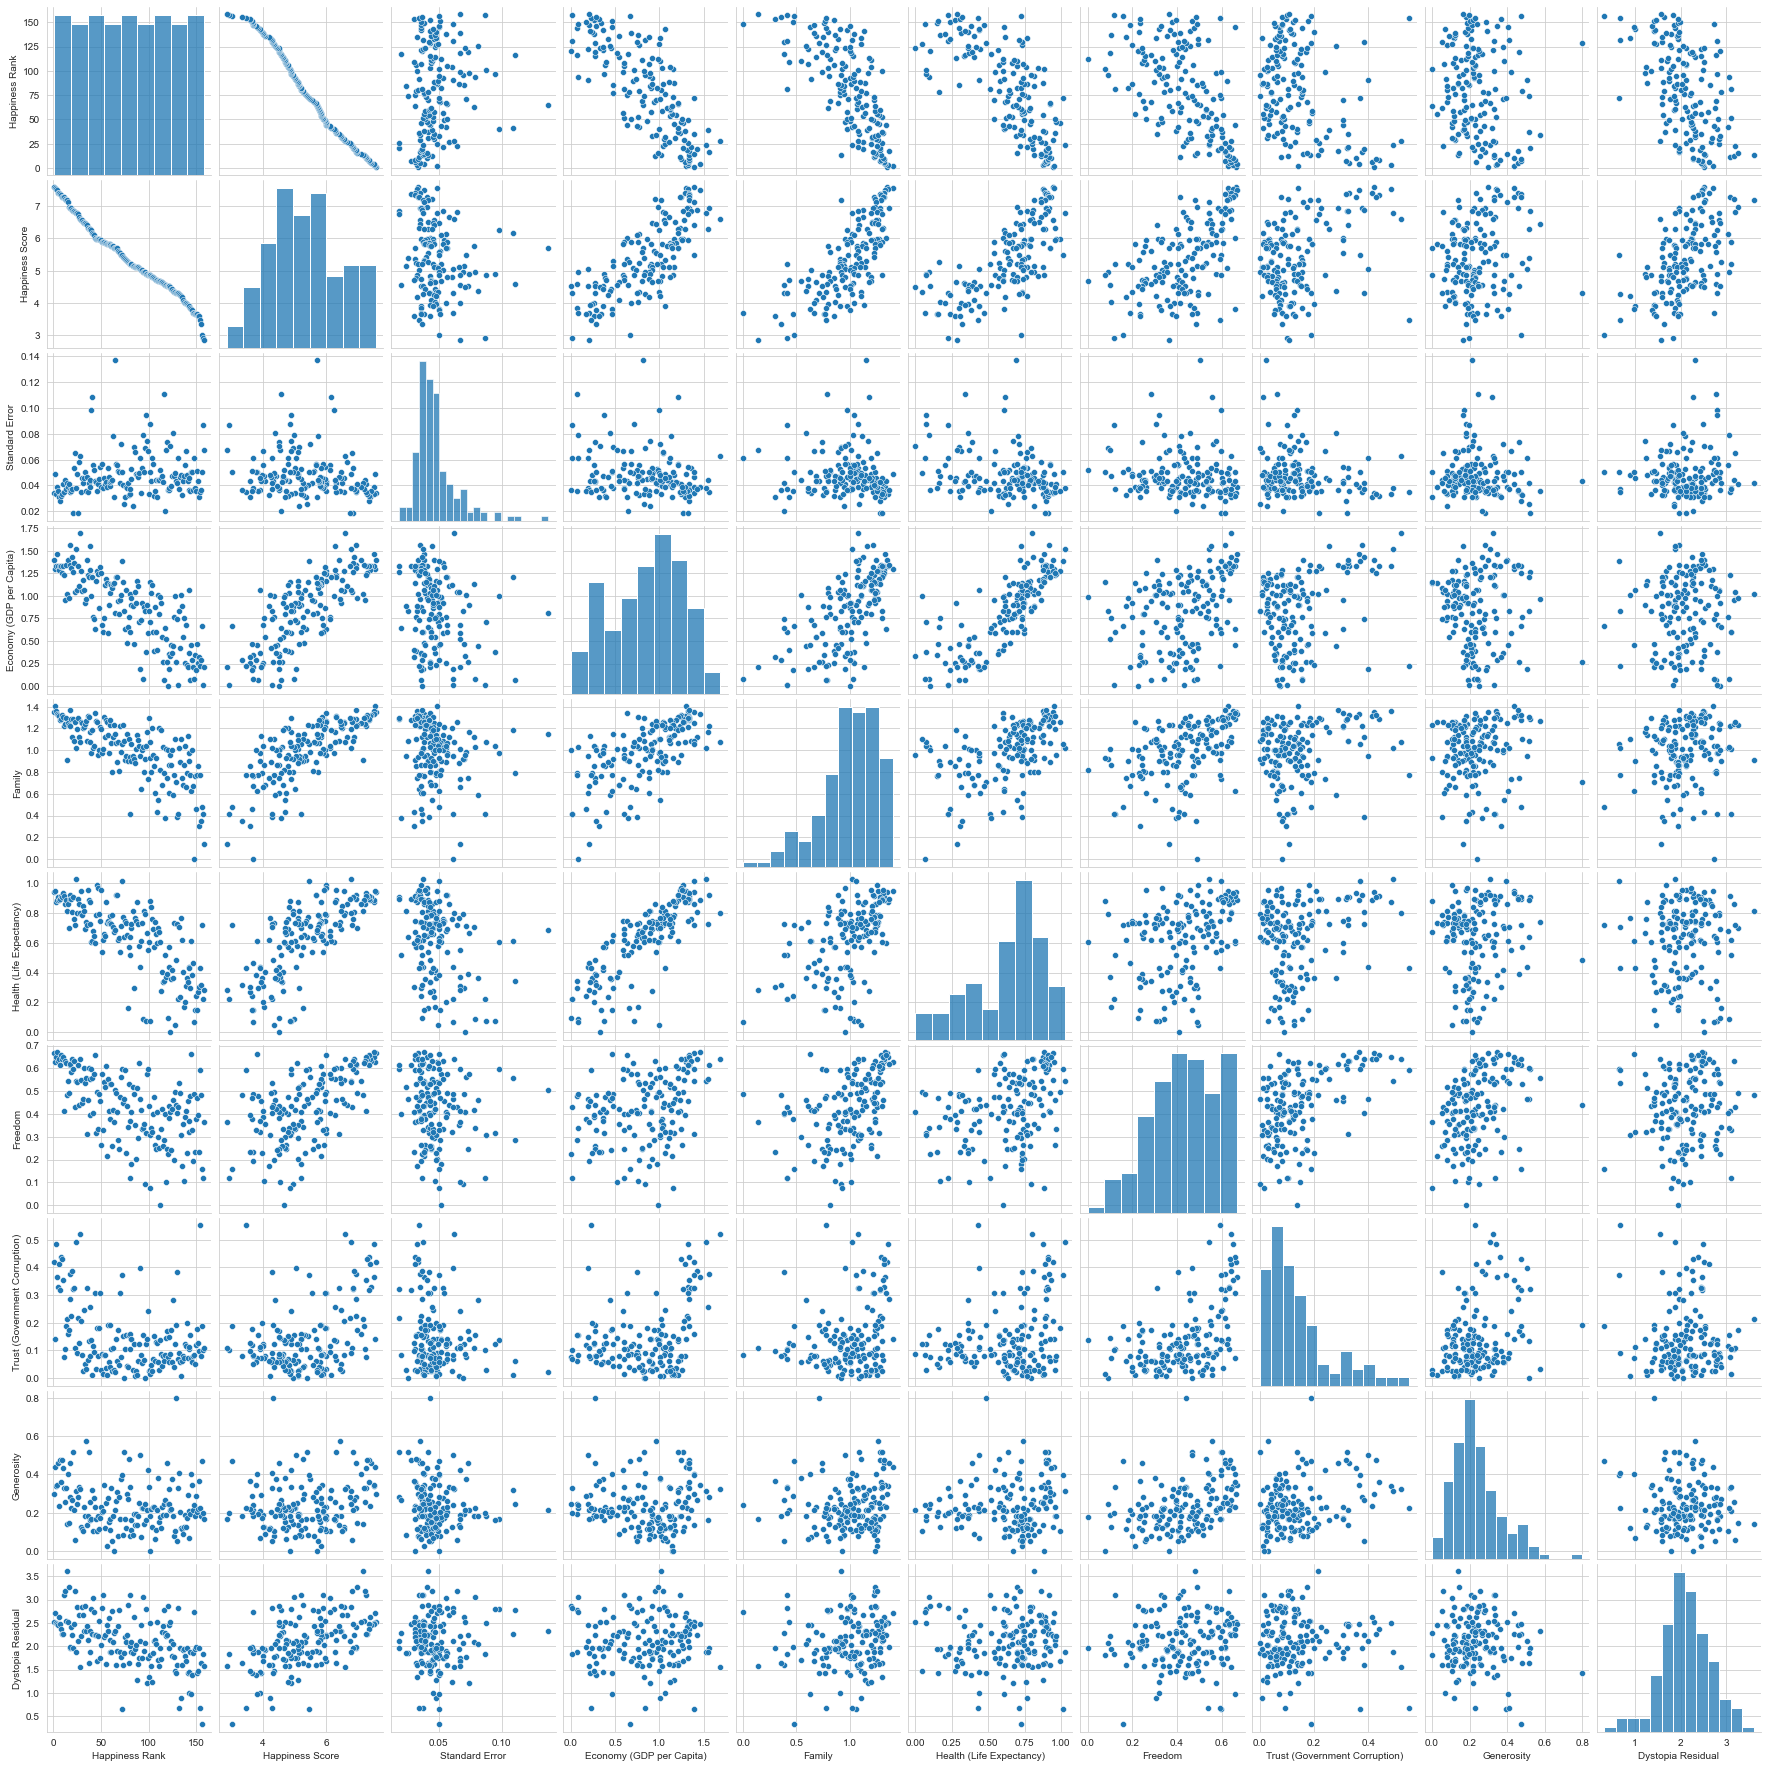

In [50]:
#Plotting pairwise relationships in the data set
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

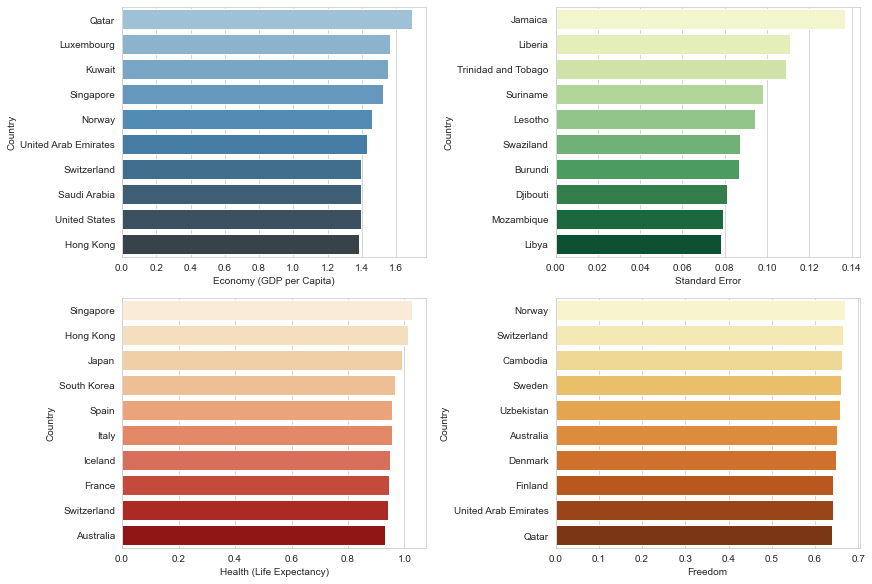

In [52]:
#Top 10 countries for each attribute
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Standard Error' ,y='Country',data=df.nlargest(10,'Standard Error'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Country'>

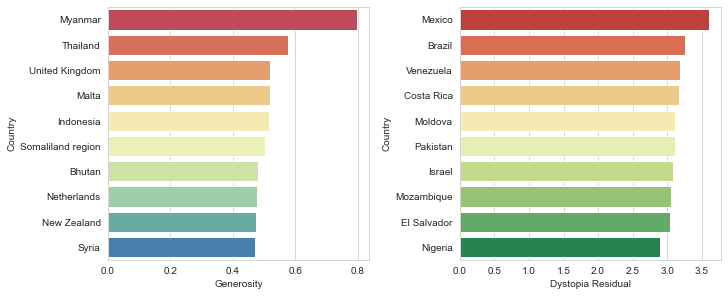

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))
sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Dystopia Residual' ,y='Country',data=df.nlargest(10,'Dystopia Residual'),ax=axes[1],palette='RdYlGn')


In [54]:
#Now I want to give a category to each country as High,Mid and Low according to their happiness scores.
print('max:',df['Happiness Score'].max())
print('min:',df['Happiness Score'].min())
add=df['Happiness Score'].max()-df['Happiness Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.587000000000001
min: 2.839
range difference: 1.583


In [55]:
low=df['Happiness Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Happiness Score'].max())

upper bound of Low grp 4.422
upper bound of Mid grp 6.005
upper bound of High grp max: 7.587000000000001


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [57]:
#I am from India I would like to see my countries position on the list and also checkout some other countries
df.loc[df['Country']=='India']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [38]:
#Lets have a head to head comparison for the some random countries to understand why they have such a good or a band rank worldwide and get some insight.
data={
    'Country':['Canada','US','UK','India'],
    'Happiness Score':[7.278,6.892,7.054,4.015],
    'Economy (GDP per Capita)':[1.365,1.433,1.333,0.755],
    'Standard Error':[1.505,1.457,1.538,0.765],
    'Health (Life Expectancy)':[1.039,0.874,0.996,0.588],
    'Freedom':[0.584,0.454,0.45,0.498],
    'Generosity':[0.285,0.28,0.348,0.2],
    'Dystopia Residual':[0.308,0.128,0.278,0.085]
}
d=pd.DataFrame(data)
d

,Country,Happiness Score,Economy (GDP per Capita),Standard Error,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
1,US,6.892,1.433,1.457,0.874,0.454,0.280,0.128
2,UK,7.054,1.333,1.538,0.996,0.450,0.348,0.278
3,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085


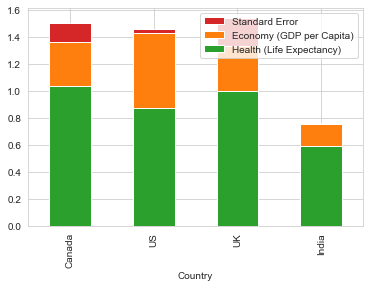

In [39]:
#Standard Error vs Economy (GDP per Capita) vs Healthy (life expectancy)
ax = d.plot(y="Standard Error", x="Country", kind="bar",color='C3')
d.plot(y="Economy (GDP per Capita)", x="Country", kind="bar", ax=ax, color="C1")
d.plot(y="Health (Life Expectancy)", x="Country", kind="bar", ax=ax, color="C2")

plt.show()

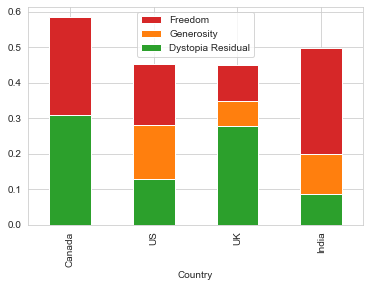

In [40]:
#Freedom  vs Generosity vs Dystopia Residual
ax = d.plot(y="Freedom", x="Country", kind="bar",color='C3')
d.plot(y="Generosity", x="Country", kind="bar", ax=ax, color="C1",)
d.plot(y="Dystopia Residual", x="Country", kind="bar", ax=ax, color="C2",)

plt.show()

Conclusion
It seems like the common criticism for “The World Happiness Report” is quite valid. A high focus on GDP and strongly correlated features such as family and life expectancy.